In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

!pip install japanize-matplotlib
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=eb92ad78dcb62792724b5ec6ac054ce980089217ab2dfc8283da423bf92162c5
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib
Mounted at /content/drive


In [2]:
root_dir="/content/drive/My Drive/Codes/Riemannian-interior-point-trust-region-method"

In [3]:
# Set variables
problem_name = "StableIdentification"
solver_name = ["RALM_SteepestDescent", "RSQO_reghess", "RIPM_RepMat", "RIPTRM_tCG"]

# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "提案手法"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "提案手法 2"
  elif solver_name == "RALM_SteepestDescent":
    return "既存手法 3"
  elif solver_name == "RSQO_reghess":
    return "既存手法 2"
  elif solver_name == "RIPM_RepMat":
    return "既存手法 1"

def set_xlabel(xaxis_col_name=None):
  if xaxis_col_name == None:
    return "反復回数"
  elif xaxis_col_name == "time":
    return "経過時間（秒）"

def set_ylabel(yaxis_col_name, is_y_logscale):
  ylabel = None
  if yaxis_col_name == "residual":
    ylabel = "残差"
  if is_y_logscale:
    ylabel = ylabel + "（対数軸）"
  return ylabel

def set_style(solver_name):
  tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
  if solver_name == "RIPTRM_tCG":
    return "-"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "--"
  elif solver_name == "RALM_SteepestDescent":
    return "--"
  elif solver_name == "RSQO_reghess":
    return "-."
  elif solver_name == "RIPM_RepMat":
    return ":"


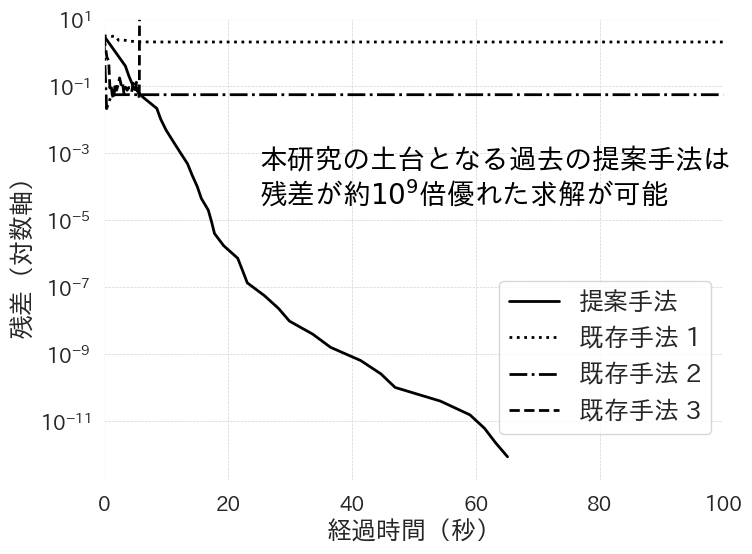

In [ ]:
# Graph plot

problem_instance = 1
problem_initialpoint = ["c"] # ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t"]
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

for initialpoint in problem_initialpoint:
  # Initial setting
  plt.figure(figsize=(8, 6))
  plt.ylabel(f"{yaxis_col_name}")

  # Collect information
  load_path = f"{root_dir}/intermediate/{problem_name}/{problem_instance}/{initialpoint}"
  for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":

      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]

    xloaded = log.loc[:,xaxis_col_name]
    xloaded = xloaded.to_frame()
    xloaded.columns = [solver]
    style = set_style(solver)
    display_name = set_display_name(solver)
    plt.plot(xloaded, yloaded, label=display_name, color="black", linestyle=style, linewidth=2)

  axs = plt.gca()
  axs.grid(True, color='lightgray', linestyle='--', linewidth=0.5)

  # # set x, y, display names
  xlabel = set_xlabel(xaxis_col_name)
  ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
  plt.xlabel(xlabel, fontsize=18)
  plt.ylabel(ylabel, fontsize=18)
  plt.tick_params(axis="x", labelsize="large")
  plt.tick_params(axis="y", labelsize="large")


  # axs.text(0.2, -9, "提案手法の急激な収束，", color="black",fontsize=16)
  axs.text(0.25, 0.675, "本研究の土台となる過去の提案手法は", color="black", fontsize=20, transform=axs.transAxes)
  axs.text(0.25, 0.6, "残差が約$10^{9}$倍優れた求解が可能", color="black", fontsize=20, transform=axs.transAxes)
  # axs.text(0.5, 0.0, "提案手法の高精度な求解を観察", color="black", fontsize=16, ha='center', va='center')
  plt.gca().set_facecolor('white')  # Axes の背景色を白に設定

  # Set the legend, grid, and y-axis scale
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="lower right",  title_fontsize="large", bbox_to_anchor=(1, 0.075), fontsize=18, facecolor='white')
  if is_y_logscale:
      plt.yscale("log")

  plt.gca().set_ylim(top=10)
  plt.gca().set_xlim(left=0, right=100)


  # Save the plot
  output_folder = f'{root_dir}/result/RIKEN_KISOTOKUKEN'
  # os.makedirs(f"{root_dir}/result/RIKEN_KISOTOKUKEN", exist_ok=True)
  # os.makedirs(f"{root_dir}/result/{problem_name}/{problem_instance}", exist_ok=True)
  os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
  # plt.savefig(f"{output_folder}/{problem_name}_{problem_instance}_{problem_instance}_{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
  plt.savefig(f"{output_folder}/{problem_name}_{problem_instance}_{initialpoint}_{xaxis_col_name}_{yaxis_col_name}_outer.pdf", dpi=600, bbox_inches='tight') #, pad_inches=0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Codes/Riemannian-interior-point-trust-region-methodintermediate/StableIdentification/1/c/RALM_SteepestDescent_log.csv'

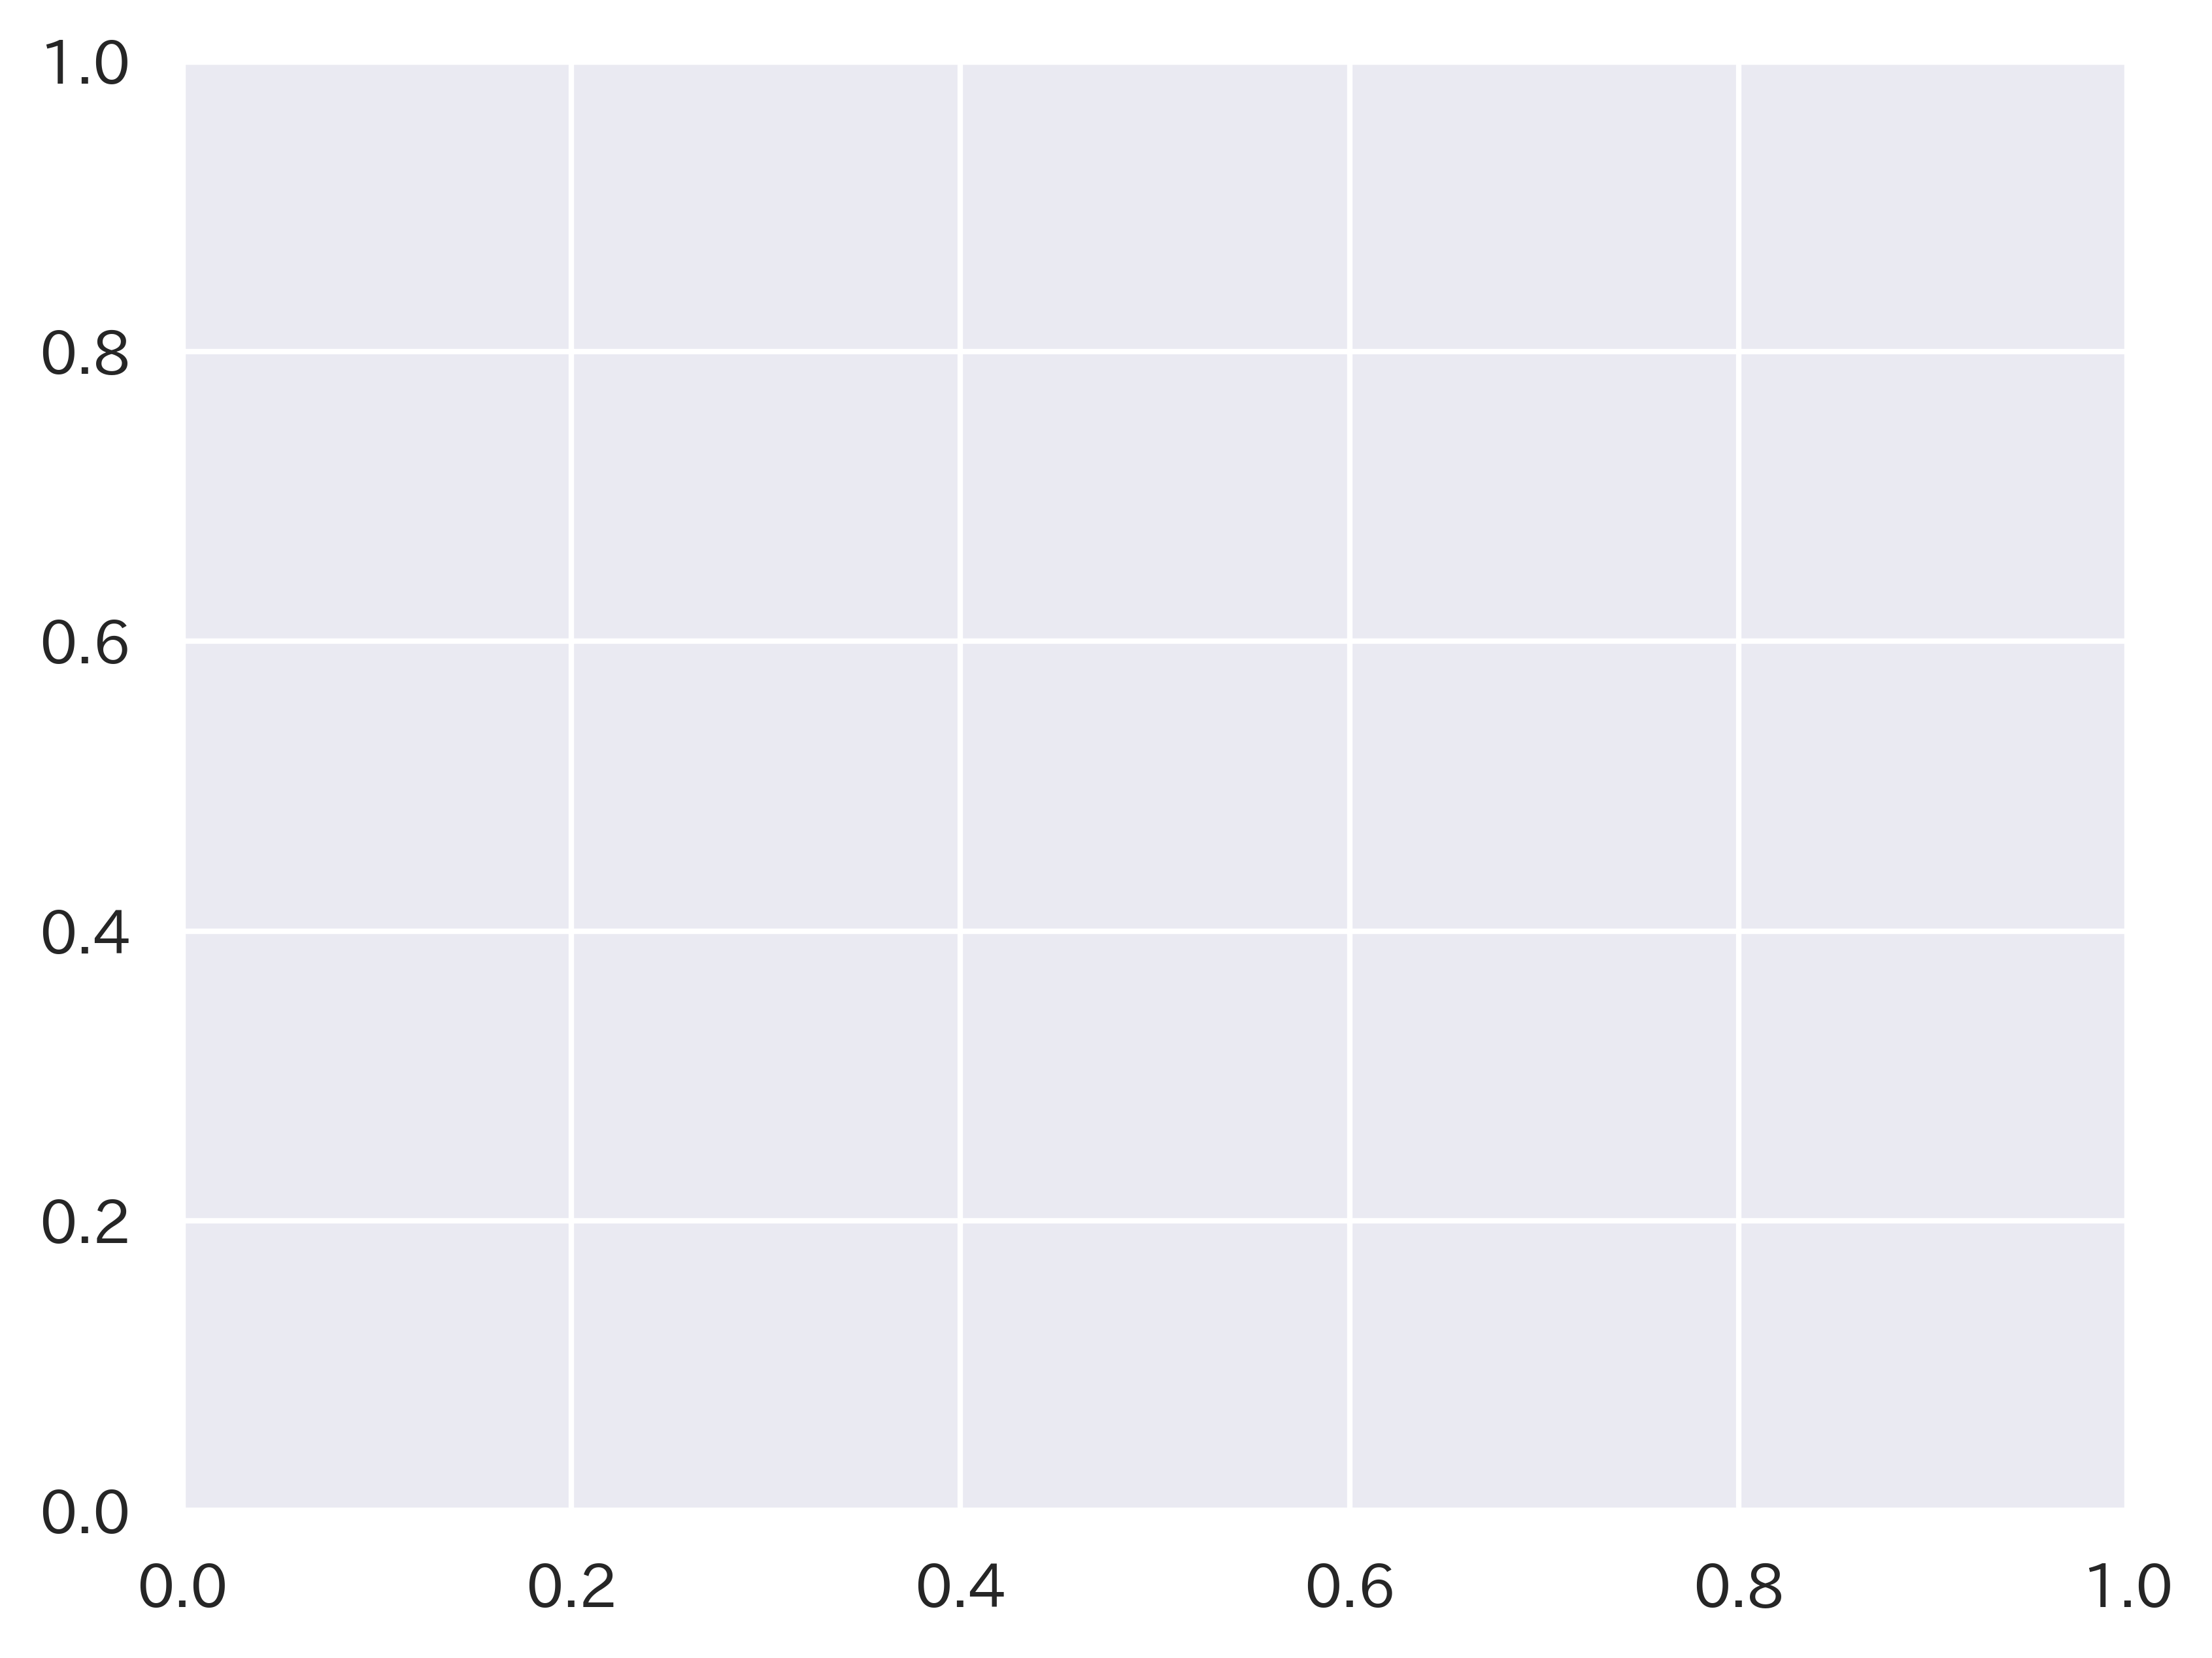

In [ ]:
rep = 1
dim = 10
den = 0.005
tol = 10
problem = "StableIdentification"
instance = "1"
initial_point = "c"
method_set = ['RALM_SteepestDescent', 'RIPTRM_tCG']

fig, axs = plt.subplots(dpi=600)
time = pd.DataFrame()
violation_sum = pd.DataFrame()

for method in method_set:
    path = root_dir + "intermediate/%s/%s/%s/%s_log.csv" % (problem, instance, initial_point, method)
    data = pd.read_csv(path)

    try:
        coltime = data['time'].copy()
        coltime.name = method
        time = pd.concat([time, coltime], axis=1)
    except:
        pass

    try:
        colviosum = data['residual'].copy()
        colviosum.name = method
        violation_sum = pd.concat([violation_sum, colviosum], axis=1)
    except:
        pass

slc = -1
subtime = time.iloc[:slc, :]
subviolation_sum = violation_sum.iloc[:slc, :]

# 列名変更（日本語表示用）
subtime.rename(columns={'RALM_SteepestDescent': '既存手法', 'RIPTRM_tCG': '提案手法'}, inplace=True)
subviolation_sum.rename(columns={'RALM_SteepestDescent': '既存手法', 'RIPTRM_tCG': '提案手法'}, inplace=True)

# プロット設定（白黒指定）
axs.plot(subtime['提案手法'], np.log10(subviolation_sum['提案手法']),
         color='black', linestyle='-', linewidth=2, label='提案手法')
axs.plot(subtime['提案手法'], np.log10(subviolation_sum['既存手法']),
         color='black', linestyle='--', linewidth=2, label='既存手法')
# axs.plot(np.arange(subviolation_sum.shape[0]), np.log10(subviolation_sum['提案手法']),
#          color='black', linestyle='-', linewidth=2, label='提案手法')
# axs.plot(np.arange(subviolation_sum.shape[0]), np.log10(subviolation_sum['既存手法']),
#          color='black', linestyle='--', linewidth=2, label='既存手法')

# グリッド設定
axs.grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# 軸設定
axs.set_xticks(np.arange(subviolation_sum.shape[0]))
axs.set_xlim(0, subviolation_sum.shape[0] - 1)

# ラベル設定
axs.set_xlabel("反復回数", fontsize=14)
axs.set_ylabel('残差 (log10)', fontsize=14)

# 凡例設定
axs.legend(loc='upper right', facecolor='white')

# テキスト注釈
# axs.text(0.2, -9, "提案手法の急激な収束，", color="black",fontsize=16)
# axs.text(0.2, -10, "高精度な求解を観察", color="black",fontsize=16)

# 背景色設定
axs.set_facecolor('white')

# ファイル保存
title = "BCnrep%dDim%dDen%.3fTol%d.csv" % (rep, dim, den, tol)
# plt.savefig(root_dir + "RIKEN_KISOTOKUKEN_RSQO.png", dpi=600, bbox_inches='tight', pad_inches=0)

plt.show() # 表示したい場合のみコメントアウトを外す

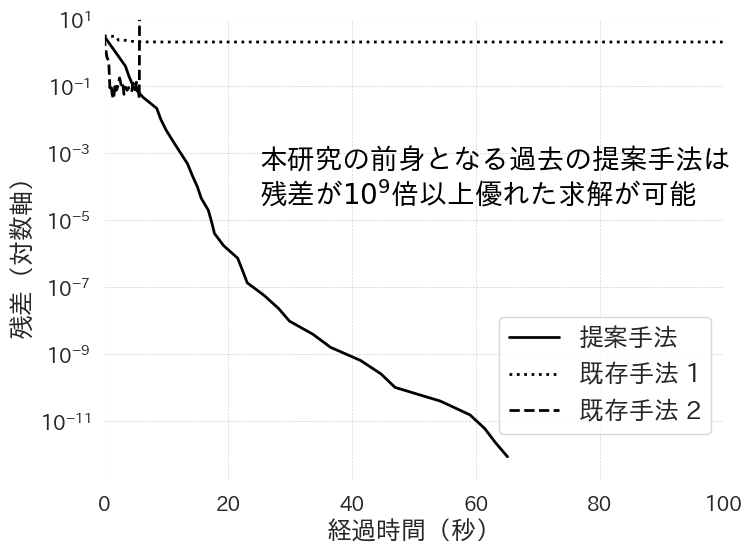

In [5]:
# 学振PDの図表．SQOの結果は消している
# Set variables
problem_name = "StableIdentification"
solver_name = ["RALM_SteepestDescent", "RIPM_RepMat", "RIPTRM_tCG"]

# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "提案手法"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "提案手法 2"
  elif solver_name == "RALM_SteepestDescent":
    return "既存手法 2"
  # elif solver_name == "RSQO_reghess":
    # return "既存手法 2"
  elif solver_name == "RIPM_RepMat":
    return "既存手法 1"

# Graph plot

problem_instance = 1
problem_initialpoint = ["c"] # ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t"]
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

for initialpoint in problem_initialpoint:
  # Initial setting
  plt.figure(figsize=(8, 6))
  plt.ylabel(f"{yaxis_col_name}")

  # Collect information
  load_path = f"{root_dir}/intermediate/{problem_name}/{problem_instance}/{initialpoint}"
  for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":

      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]

    xloaded = log.loc[:,xaxis_col_name]
    xloaded = xloaded.to_frame()
    xloaded.columns = [solver]
    style = set_style(solver)
    display_name = set_display_name(solver)
    plt.plot(xloaded, yloaded, label=display_name, color="black", linestyle=style, linewidth=2)

  axs = plt.gca()
  axs.grid(True, color='lightgray', linestyle='--', linewidth=0.5)

  # # set x, y, display names
  xlabel = set_xlabel(xaxis_col_name)
  ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
  plt.xlabel(xlabel, fontsize=18)
  plt.ylabel(ylabel, fontsize=18)
  plt.tick_params(axis="x", labelsize="large")
  plt.tick_params(axis="y", labelsize="large")


  # axs.text(0.2, -9, "提案手法の急激な収束，", color="black",fontsize=16)
  axs.text(0.25, 0.675, "本研究の前身となる過去の提案手法は", color="black", fontsize=20, transform=axs.transAxes)
  axs.text(0.25, 0.6, "残差が$10^{9}$倍以上優れた求解が可能", color="black", fontsize=20, transform=axs.transAxes)
  # axs.text(0.5, 0.0, "提案手法の高精度な求解を観察", color="black", fontsize=16, ha='center', va='center')
  plt.gca().set_facecolor('white')  # Axes の背景色を白に設定

  # Set the legend, grid, and y-axis scale
  handles, labels = plt.gca().get_legend_handles_labels()
  plt.legend(handles[::-1], labels[::-1], loc="lower right",  title_fontsize="large", bbox_to_anchor=(1, 0.075), fontsize=18, facecolor='white')
  if is_y_logscale:
      plt.yscale("log")

  plt.gca().set_ylim(top=10)
  plt.gca().set_xlim(left=0, right=100)


  # Save the plot
  output_folder = f'{root_dir}/result/GakushinPD'
  # os.makedirs(f"{root_dir}/result/RIKEN_KISOTOKUKEN", exist_ok=True)
  # os.makedirs(f"{root_dir}/result/{problem_name}/{problem_instance}", exist_ok=True)
  os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
  # plt.savefig(f"{output_folder}/{problem_name}_{problem_instance}_{problem_instance}_{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
  plt.savefig(f"{output_folder}/{problem_name}_{problem_instance}_{initialpoint}_{xaxis_col_name}_{yaxis_col_name}_outer.pdf", dpi=600, bbox_inches='tight') #, pad_inches=0)